<function matplotlib.pyplot.show(close=None, block=None)>

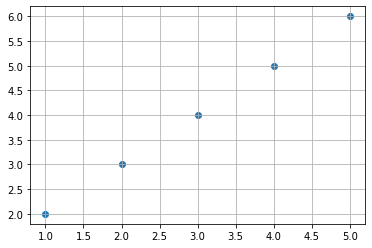

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])
x = data[:,0]
y = data[:,1]

plt.scatter(x,y)
plt.grid(True)
plt.show







In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

In [3]:
content = ["How to format my hard disk", "Hard disk format problems"]
x = vectorizer.fit_transform(content)

In [4]:
vectorizer.get_feature_names()
[u'disk', u'format',u'hard', u'how', u'my', u'problems', u'to']

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [5]:
x.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [6]:
x.toarray()[0]

array([1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [7]:
x.toarray()[1,2]

1

In [9]:
from sklearn.datasets import fetch_20newsgroups

In [13]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [14]:
twenty_train = fetch_20newsgroups(subset= 'train', categories= categories,shuffle=True, random_state = 42)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer()

In [18]:
trian_counts = vectorizer.fit_transform(twenty_train.data)

In [19]:
vectorizer.vocabulary_.get('algorithm')

4690

In [20]:
len(vectorizer.get_feature_names())

35788

In [21]:
import nltk

In [22]:
s = nltk.stem.SnowballStemmer('english')

In [23]:
s.stem("cats")

'cat'

In [24]:
s.stem("loving")

'love'

In [29]:
from nltk.tokenize import word_tokenize

In [ ]:
text = word_tokenize("And now for something completely different")

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')

In [30]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

In [36]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer=super (StemmedCountVectorizer, self).build_analyzer()
        return lambda doc:(english_stemmer.stem(w) for w in  analyzer(doc))

In [37]:
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
stem_analyze = stem_vectorizer.build_analyzer()

In [38]:
Y = stem_analyze("John bought carrots and potatoes")
for tok in Y:
    print(tok)

john
bought
carrot
potato


In [40]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
train_counts = stem_vectorizer.fit_transform(twenty_train.data)
len(stem_vectorizer.get_feature_names())

26888

In [41]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["spanish"])
spanish_stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words=my_stop_words)
spanish_stem_analyze = spanish_stem_vectorizer.build_analyzer()

In [44]:
Y = spanish_stem_analyze("Soy celíaca, pero me gustaría comer una hamburguesa")
for tok in Y:
    print(tok)

soy
celíaca
pero
gustaría
comer
una
hamburguesa


In [45]:
Y = spanish_stem_analyze("Aguante Taylor Swift y Messi")
for tok in Y:
    print(tok)

aguant
taylor
swift
messi


In [46]:
from nltk.corpus import cess_esp

palabras = cess_esp.words(cess_esp.fileids()[0])
train_counts = spanish_stem_vectorizer.fit_transform(palabras)
len(spanish_stem_vectorizer.get_feature_names())

115